# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
df=pd.read_csv("train.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [8]:
df['Doors'].replace('02-Mar','2',inplace=True)
df['Doors'].replace('>5','5',inplace=True)
df['Doors'].replace('04-May','4',inplace=True)

In [9]:
import numpy as np

In [10]:
df['Levy'].replace('-', np.nan, inplace = True)

df['Levy'].replace( np.nan,-999, inplace = True)

In [11]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [12]:
df[['Levy']] = df[["Levy"]].astype("float64")

In [13]:
df['Levy'].replace(np.nan,df['Levy'].mean(), inplace = True)

df['Levy']=df['Levy'].replace(-999,df['Levy'].mean(),inplace=True)

In [14]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [15]:
# replace "?" to NaN
df.replace("[", np.nan, inplace = True)
df.replace("]", np.nan, inplace = True)
df.replace("<", np.nan, inplace = True)
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4,Left wheel,Silver,4


In [16]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [17]:
missing_data = df.isnull()
missing_data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

ID
False    19237
Name: ID, dtype: int64

Price
False    19237
Name: Price, dtype: int64

Levy
False    19237
Name: Levy, dtype: int64

Manufacturer
False    19237
Name: Manufacturer, dtype: int64

Model
False    19237
Name: Model, dtype: int64

Prod. year
False    19237
Name: Prod. year, dtype: int64

Category
False    19237
Name: Category, dtype: int64

Leather interior
False    19237
Name: Leather interior, dtype: int64

Fuel type
False    19237
Name: Fuel type, dtype: int64

Engine volume
False    19237
Name: Engine volume, dtype: int64

Mileage
False    19237
Name: Mileage, dtype: int64

Cylinders
False    19237
Name: Cylinders, dtype: int64

Gear box type
False    19237
Name: Gear box type, dtype: int64

Drive wheels
False    19237
Name: Drive wheels, dtype: int64

Doors
False    19237
Name: Doors, dtype: int64

Wheel
False    19237
Name: Wheel, dtype: int64

Color
False    19237
Name: Color, dtype: int64

Airbags
False    19237
Name: Airbags, dtype: int64



In [19]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906.838128,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,4,Left wheel,Black,4


In [20]:
df2=pd.read_csv('test.csv')

In [21]:
df2.isnull().sum()

ID                     0
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Price               8245
dtype: int64

In [22]:
cols = ['Price']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0


In [23]:
df[['Levy']] = df[["Levy"]].astype("int")

In [24]:
df[['Doors']] = df[["Doors"]].astype("int")

In [25]:
d=list(df["Mileage"].unique())
print(len(d))
d

7687


['186005 km',
 '192000 km',
 '200000 km',
 '168966 km',
 '91901 km',
 '160931 km',
 '258909 km',
 '216118 km',
 '398069 km',
 '128500 km',
 '184467 km',
 '0 km',
 '350000 km',
 '138038 km',
 '76000 km',
 '74146 km',
 '121840 km',
 '54317 km',
 '295059 km',
 '364523 km',
 '112645 km',
 '187000 km',
 '39709 km',
 '230000 km',
 '210000 km',
 '169000 km',
 '158787 km',
 '420550 km',
 '180000 km',
 '175056 km',
 '287274 km',
 '250000 km',
 '162000 km',
 '10200 km',
 '158000 km',
 '103490 km',
 '382746 km',
 '203200 km',
 '61057 km',
 '11200 km',
 '141000 km',
 '160259 km',
 '239342 km',
 '128000 km',
 '100734 km',
 '141500 km',
 '147000 km',
 '87768 km',
 '264014 km',
 '132542 km',
 '1600 km',
 '87000 km',
 '260000 km',
 '5323 km',
 '87112 km',
 '204318 km',
 '22000 km',
 '83000 km',
 '170000 km',
 '312118 km',
 '130000 km',
 '200279 km',
 '719847 km',
 '154672 km',
 '110969 km',
 '225510 km',
 '148105 km',
 '255456 km',
 '111643 km',
 '84506 km',
 '288000 km',
 '75000 km',
 '94362 km',
 '1

In [26]:
df[['Mileage']] = df[["Mileage"]].astype("str")
df['Mileage'] = df['Mileage'].str.replace(' km', '')

In [27]:
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: object

In [28]:
df[['Mileage']] = df[["Mileage"]].astype("int64")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int32  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int32  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [30]:
# new data frame with split value columns
new = df["Engine volume"].str.split(" ", n = 1, expand = True)
                                    
# making separate first name column from new data frame
df["Engine volume num"]= new[0]
                                    
# making separate last name column from new data frame
df["turbo"]= new[1] 
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,None
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3,None
2,45774419,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,None
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,None
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,2.0,Turbo
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,2.4,None
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,2,None
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4,Left wheel,Black,4,2,None


In [31]:
df[['Engine volume num']] = df[["Engine volume num"]].astype("float64")

In [32]:
df['turbo'].replace('None',0,inplace=True)
df['turbo'].replace('Turbo',1,inplace=True)

In [33]:
df['turbo'].unique()

array([nan,  1.])

In [34]:
df['turbo'].replace(np.nan,0,inplace=True)

In [35]:
df[['turbo']] = df[["turbo"]].astype("uint8")

In [36]:
cols = [['Manufacturer',"Model","Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color']]
le = OrdinalEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [37]:
df['Engine volume'] = le.fit_transform(df[['Engine volume']])

In [38]:
sts = MaxAbsScaler()

In [39]:
feature_scale = ['ID','Levy','Prod. year','Cylinders','Doors','Airbags','Mileage','Engine volume num','Manufacturer',"Model","Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color']
df[feature_scale]=sts.fit_transform(df[feature_scale])

In [40]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [204]:
model = XGBRegressor()

In [205]:
model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [206]:
model.score(x,y)

0.9992786901433157

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [208]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    legend = plt.legend(loc = "upper right",fontsize = "medium")
    plt.xlabel('no. of entries')
    plt.ylabel('Loan sanctitioned USD')
    
    plt.show()
    plt.close()

In [209]:
y_predicted2=model.predict(x)

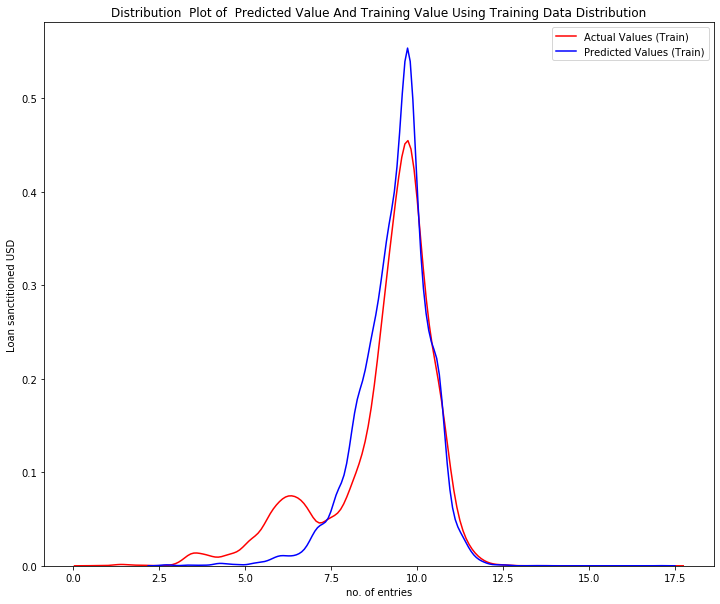

In [210]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(np.log(y+1),np.log(y_predicted2+1) , "Actual Values (Train)", "Predicted Values (Train)", Title)

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                8245 non-null   int64 
 1   Levy              8245 non-null   object
 2   Manufacturer      8245 non-null   object
 3   Model             8245 non-null   object
 4   Prod. year        8245 non-null   int64 
 5   Category          8245 non-null   object
 6   Leather interior  8245 non-null   object
 7   Fuel type         8245 non-null   object
 8   Engine volume     8245 non-null   object
 9   Mileage           8245 non-null   object
 10  Cylinders         8245 non-null   int64 
 11  Gear box type     8245 non-null   object
 12  Drive wheels      8245 non-null   object
 13  Doors             8245 non-null   object
 14  Wheel             8245 non-null   object
 15  Color             8245 non-null   object
 16  Airbags           8245 non-null   int64 
dtypes: int64(4), o

In [106]:
df2['Levy'].replace('-',np.nan,inplace=True)

In [107]:
df2[['Levy']] = df2[["Levy"]].astype("float64")

In [108]:
df2['Levy'].replace(np.nan,df2['Levy'].mean(),inplace=True)

In [109]:
df2[['Levy']] = df2[["Levy"]].astype("int64")

In [110]:
df2['Doors'].unique()

array(['02-Mar', '04-May', '>5'], dtype=object)

In [111]:
df2['Doors'].replace('02-Mar','2',inplace=True)
df2['Doors'].replace('>5','5',inplace=True)
df2['Doors'].replace('04-May','4',inplace=True)

In [112]:
df2[['Doors']] = df2[["Doors"]].astype("int")

In [113]:
df2['Mileage'].unique()

array(['0 km', '26000 km', '168000 km', ..., '81109 km', '146697 km',
       '148633 km'], dtype=object)

In [114]:
df2[['Mileage']] = df2[["Mileage"]].astype("str")
df2['Mileage'] = df2['Mileage'].str.replace(' km', '')

In [115]:
df2[['Mileage']] = df2[["Mileage"]].astype("int64")

In [116]:
# new data frame with split value columns
new = df2["Engine volume"].str.split(" ", n = 1, expand = True)
                                    
# making separate first name column from new data frame
df2["Engine volume num"]= new[0]
                                    
# making separate last name column from new data frame
df2["turbo"]= new[1] 
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,44020629,917,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0,4,Manual,Front,2,Left wheel,Grey,10,2.0,Turbo
1,45784798,917,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,4,Left wheel,Grey,10,2.4,None
2,45800257,917,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,4,Right-hand drive,Sky blue,8,1.5,None
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,4,Left wheel,Blue,12,3.2,None
4,45814303,917,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,4,Left wheel,Black,0,1.6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000,4,Manual,Front,4,Left wheel,Blue,6,1.6,None
8241,45682346,917,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000,4,Tiptronic,Front,4,Left wheel,Black,6,2.8,Turbo
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907,8,Automatic,4x4,4,Left wheel,Black,0,4.6,None
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000,4,Automatic,Front,4,Left wheel,Green,4,1.5,None


In [117]:
df2[['Engine volume num']] = df2[["Engine volume num"]].astype("float64")

In [118]:
df2['turbo'].replace('None',0,inplace=True)
df2['turbo'].replace('Turbo',1,inplace=True)

In [119]:
df2['turbo'].unique()

array([ 1., nan])

In [120]:
df2['turbo'].replace(np.nan,0,inplace=True)

In [121]:
df2[['turbo']] = df2[["turbo"]].astype("uint8")

In [122]:
cols = ['Manufacturer',"Model","Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color','Engine volume']
le = OrdinalEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [123]:
feature_scale = ['ID','Levy','Prod. year','Cylinders','Doors','Airbags','Mileage','Engine volume num','Manufacturer',"Model","Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color']
df2[feature_scale]=sts.fit_transform(df2[feature_scale])

In [124]:
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,0.960800,0.121812,0.950820,0.524145,0.996040,0.3,0.0,0.166667,32,0.000000,0.031496,0.333333,0.5,0.4,0.0,0.466667,0.625,0.185185,1
1,0.999305,0.121812,0.377049,0.842052,0.996040,0.9,1.0,0.833333,39,0.000012,0.031496,0.666667,0.5,0.8,0.0,0.466667,0.625,0.222222,0
2,0.999642,0.121812,0.655738,0.890342,0.992574,0.9,0.0,0.833333,20,0.000078,0.031496,0.000000,0.5,0.8,1.0,0.866667,0.500,0.138889,0
3,0.999593,0.129516,0.967213,0.975855,0.996040,0.4,1.0,0.833333,54,0.000067,0.047244,0.000000,0.0,0.8,0.0,0.133333,0.750,0.296296,0
4,0.999949,0.121812,0.672131,0.165996,0.986634,0.3,0.0,0.833333,22,0.000093,0.031496,0.333333,0.5,0.8,0.0,0.066667,0.000,0.148148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,0.978343,0.180260,0.245902,0.872233,0.992079,1.0,0.0,0.833333,22,0.000076,0.031496,0.333333,0.5,0.8,0.0,0.133333,0.375,0.148148,0
8241,0.997069,0.121812,0.081967,0.096579,0.996040,0.9,1.0,0.833333,48,0.000073,0.031496,0.666667,0.5,0.8,0.0,0.066667,0.375,0.259259,1
8242,0.996360,0.218650,0.491803,0.512072,0.997525,0.4,1.0,0.833333,75,0.000048,0.062992,0.000000,0.0,0.8,0.0,0.066667,0.000,0.425926,0
8243,0.999849,0.104145,0.901639,0.156942,0.998515,0.3,1.0,0.833333,20,0.000001,0.031496,0.000000,0.5,0.8,0.0,0.400000,0.250,0.138889,0


In [125]:
y_predicted1=model.predict(df2)

In [126]:
y_predicted1

array([13446.389 , 21727.633 ,  4394.7124, ..., 12499.797 , 45975.79  ,
        -660.9985], dtype=float32)

In [127]:
submission=pd.DataFrame({
    'Price':abs(y_predicted1)
})
submission

,Price
0,13446.388672
1,21727.632812
2,4394.712402
3,5435.087891
4,5356.021484
...,...
8240,2926.989014
8241,24032.802734
8242,12499.796875
8243,45975.789062


In [128]:
submission.to_csv('fourth_try.csv',index=False)

In [61]:
from lightgbm import LGBMRegressor

In [62]:
model1 = LGBMRegressor()

In [63]:
model1.fit(x,y)

LGBMRegressor()

In [64]:
model1.score(x,y)

0.5093323414708605

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19237 non-null  float64
 1   Price              19237 non-null  int64  
 2   Levy               19237 non-null  float64
 3   Manufacturer       19237 non-null  int32  
 4   Model              19237 non-null  int32  
 5   Prod. year         19237 non-null  float64
 6   Category           19237 non-null  int32  
 7   Leather interior   19237 non-null  int32  
 8   Fuel type          19237 non-null  int32  
 9   Engine volume      19237 non-null  int32  
 10  Mileage            19237 non-null  float64
 11  Cylinders          19237 non-null  float64
 12  Gear box type      19237 non-null  int32  
 13  Drive wheels       19237 non-null  int32  
 14  Doors              19237 non-null  float64
 15  Wheel              19237 non-null  int32  
 16  Color              192

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 8245 non-null   float64
 1   Levy               8245 non-null   float64
 2   Manufacturer       8245 non-null   int32  
 3   Model              8245 non-null   int32  
 4   Prod. year         8245 non-null   float64
 5   Category           8245 non-null   int32  
 6   Leather interior   8245 non-null   int32  
 7   Fuel type          8245 non-null   int32  
 8   Engine volume      8245 non-null   int32  
 9   Mileage            8245 non-null   float64
 10  Cylinders          8245 non-null   float64
 11  Gear box type      8245 non-null   int32  
 12  Drive wheels       8245 non-null   int32  
 13  Doors              8245 non-null   float64
 14  Wheel              8245 non-null   int32  
 15  Color              8245 non-null   int32  
 16  Airbags            8245 

In [61]:
df.to_csv('train_try.csv',index=False)

In [62]:
df2.to_csv('test_try.csv',index=False)

In [211]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')

In [219]:
stack = StackingCVRegressor(regressors=(ridge,lgbm, xgb,lasso,svr,rf),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)



In [ ]:
stack.fit(X_train, y_train)

In [ ]:
pred = stack.predict(X_test)
score = r2_score(y_test, pred)

In [ ]:
score

In [ ]:
stack.score(X_train,y_train)

In [220]:
stack.fit(x,y)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_delta_step=None,
                                                max_depth=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n

In [221]:
stack.score(x,y)

-0.4687190803130623

In [222]:
y_predicted2=stack.predict(x)

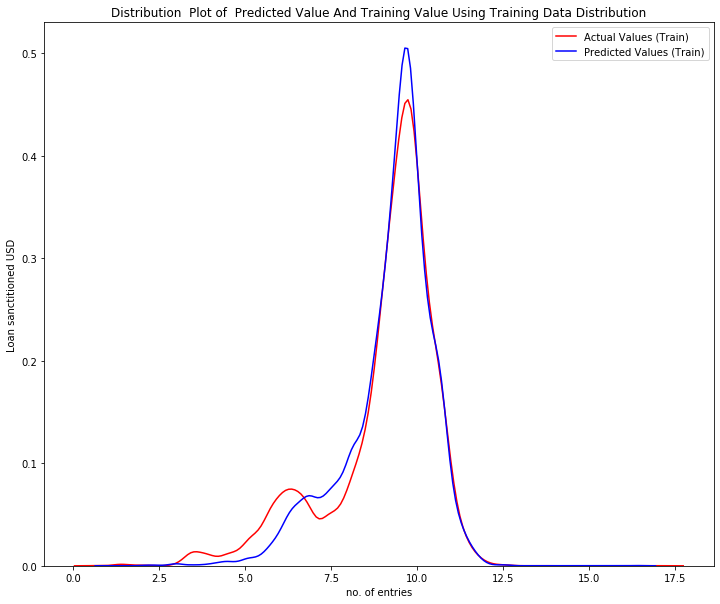

In [223]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(np.log(1+y), np.log(1+y_predicted2), "Actual Values (Train)", "Predicted Values (Train)", Title)

In [224]:
y_predicted2

array([13516.872 , 14571.544 ,  8185.2876, ..., 20994.293 ,  5159.1353,
         978.9933], dtype=float32)

In [1]:
import h2o

In [2]:
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ayush\AppData\Local\Temp\tmp_j6qel6g
  JVM stdout: C:\Users\ayush\AppData\Local\Temp\tmp_j6qel6g\h2o_ayush_started_from_python.out
  JVM stderr: C:\Users\ayush\AppData\Local\Temp\tmp_j6qel6g\h2o_ayush_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_ayush_jwjqne
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,880 Mb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data_path=r'trainh2o.csv'

In [4]:
df=h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
df

Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo,Model_variant
13328,0.350714,5,1200,4,1,2,0.465122,0.375,0,0,0.8,0,12,0.75,0.522388,0,0
16621,0.255202,1,642,4,0,5,0.480113,0.375,2,0,0.8,0,1,0.5,0.447761,0,0
8467,0.227335,5,666,3,0,5,0.500118,0.25,3,1,0.8,1,1,0.125,0.19403,0,0
3607,0.216094,2,645,4,1,2,0.422514,0.25,0,0,0.8,0,14,0,0.373134,0,0
11726,0.111807,5,666,3,1,5,0.229807,0.25,0,1,0.8,0,12,0.25,0.19403,0,1
39493,0.223364,3,1259,4,1,1,0.402422,0.25,0,1,0.8,0,14,0.25,0.298507,0,1
1803,0.190775,6,1114,3,1,2,0.647425,0.25,0,1,0.8,0,14,0.75,0.268657,0,0
549,0.188268,3,1288,9,1,5,0.540422,0.25,0,1,0.8,0,7,0.75,0.358209,0,0
1098,0.0987716,6,425,9,1,2,0.995406,0.25,0,1,0.8,0,1,0.75,0.373134,0,1
26657,0.227335,5,1194,4,1,5,0.321326,0.375,0,0,0.8,0,12,0.75,0.522388,0,0


In [5]:
y='Price'
x=df.columns

In [6]:
aml = H2OAutoML(max_models=10,seed=1)
aml.train(x=x,y=y,training_frame=df)

AutoML progress: |
12:05:32.378: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [7]:
lb = aml.leaderboard

In [8]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210718_120532,5.87229e+07,7663.08,5.87229e+07,4444.58,nan
StackedEnsemble_BestOfFamily_AutoML_20210718_120532,5.88435e+07,7670.95,5.88435e+07,4418.86,nan
DRF_1_AutoML_20210718_120532,6.08297e+07,7799.34,6.08297e+07,4428.66,1.06276
GBM_4_AutoML_20210718_120532,6.14914e+07,7841.65,6.14914e+07,4700.6,nan
GBM_3_AutoML_20210718_120532,6.37375e+07,7983.58,6.37375e+07,4877.25,nan
GBM_2_AutoML_20210718_120532,6.56413e+07,8101.93,6.56413e+07,5028.66,nan
GBM_1_AutoML_20210718_120532,6.59974e+07,8123.88,6.59974e+07,5126.49,nan
XRT_1_AutoML_20210718_120532,6.67253e+07,8168.56,6.67253e+07,4961.74,1.18584
GBM_5_AutoML_20210718_120532,6.86774e+07,8287.18,6.86774e+07,5169.46,nan
GBM_grid__1_AutoML_20210718_120532_model_1,7.74946e+07,8803.1,7.74946e+07,5765.12,nan


In [ ]:
#get model ids for all models in automl leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
#get the All models styacked ensemble model
se = h2o.get_model([mid for mid in model_ids if 'StackedEnsemble_AllModels' in mid][0])

In [ ]:
#get the stacked ensemble meta learner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
metalearner.coef_norm()

In [ ]:
%matplotlib inline
metalearner.std_coef_plot()

In [ ]:
car_h2o_drf = h2o.get_model("DRF_1_AutoML_20210717_130239")

In [ ]:
car_h2o_drf

In [ ]:
car_h2o_gbm = h2o.get_model("GBM_4_AutoML_20210717_130239")

In [ ]:
car_h2o_gbm

In [ ]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()

# import the cars dataset:
# this dataset is used to classify whether or not a car is economical based on
# the car's displacement, power, weight, and acceleration, and the year it was made
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")

# set the predictor names and the response column name
predictors = ["displacement","power","weight","acceleration","year"]
response = "Price"

# split into train and validation sets
train, valid = cars.split_frame(ratios = [.8], seed = 1234)

# train a GBM model
cars_gbm = H2OGradientBoostingEstimator(distribution = "poisson", seed = 1234)
cars_gbm.train(x = predictors,
               y = response,
               training_frame = train,
               validation_frame = valid)

# retrieve the model performance
perf = cars_gbm.model_performance(valid)
perf